In [53]:
from pipelines.pipeline_meteostat_diario import acessar_csv_s3
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [21]:
bucket_name = 'black-umbrella-fiap'
object_key = 'gold/ocorrencias_meteostat_diario/integracao_ocorr_diario.csv'

In [22]:
df = acessar_csv_s3(bucket_name, object_key)

In [23]:
df

,data,tavg,tmin,tmax,prcp,wdir,wspd,pres,distrito,latitude_distrito,longitude_distrito,ocorrencia,longitude_ocorrencia,latitude_ocorrencia
0,2013-01-01,25.5,21.9,31.0,0.0,316.0,16.8,1017.511112,Agua Rasa,-23.565372,-46.573697,NaN,NaN,NaN
1,2013-01-01,25.5,21.9,31.0,0.0,316.0,16.8,1017.511112,Alto De Pinheiros,-23.549906,-46.707642,NaN,NaN,NaN
2,2013-01-01,25.5,21.9,31.0,0.0,316.0,16.8,1017.511112,Anhanguera,-23.432908,-46.788534,NaN,NaN,NaN
3,2013-01-01,25.5,21.9,31.0,0.0,316.0,16.8,1017.511112,Aricanduva,-23.578024,-46.511454,NaN,NaN,NaN
4,2013-01-01,29.6,20.0,31.0,0.0,315.0,11.1,1017.511112,Artur Alvim,-23.540469,-46.489791,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427405,2024-09-16,16.6,14.9,18.5,3.5,175.0,15.1,1016.500000,Vila Mariana,-23.583700,-46.632741,NaN,NaN,NaN
427406,2024-09-16,16.6,14.2,20.3,4.5,150.0,15.5,1020.800000,Vila Matilde,-23.536179,-46.524605,NaN,NaN,NaN
427407,2024-09-16,17.4,15.6,21.0,3.2,190.0,10.9,1017.600000,Vila Medeiros,-23.487707,-46.584496,NaN,NaN,NaN
427408,2024-09-16,16.6,14.9,18.5,3.5,175.0,15.1,1016.500000,Vila Prudente,-23.592335,-46.574961,NaN,NaN,NaN


In [24]:
data_info = df.info()
data_head = df.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427410 entries, 0 to 427409
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   data                  427410 non-null  object 
 1   tavg                  427410 non-null  float64
 2   tmin                  427410 non-null  float64
 3   tmax                  427410 non-null  float64
 4   prcp                  427410 non-null  float64
 5   wdir                  427410 non-null  float64
 6   wspd                  427410 non-null  float64
 7   pres                  427410 non-null  float64
 8   distrito              427369 non-null  object 
 9   latitude_distrito     426336 non-null  float64
 10  longitude_distrito    426336 non-null  float64
 11  ocorrencia            58272 non-null   object 
 12  longitude_ocorrencia  58272 non-null   float64
 13  latitude_ocorrencia   58272 non-null   float64
dtypes: float64(11), object(3)
memory usage: 45.7+ MB


(None,
          data  tavg  tmin  tmax  prcp   wdir  wspd         pres  \
 0  2013-01-01  25.5  21.9  31.0   0.0  316.0  16.8  1017.511112   
 1  2013-01-01  25.5  21.9  31.0   0.0  316.0  16.8  1017.511112   
 2  2013-01-01  25.5  21.9  31.0   0.0  316.0  16.8  1017.511112   
 3  2013-01-01  25.5  21.9  31.0   0.0  316.0  16.8  1017.511112   
 4  2013-01-01  29.6  20.0  31.0   0.0  315.0  11.1  1017.511112   
 
             distrito  latitude_distrito  longitude_distrito ocorrencia  \
 0          Agua Rasa         -23.565372          -46.573697        NaN   
 1  Alto De Pinheiros         -23.549906          -46.707642        NaN   
 2         Anhanguera         -23.432908          -46.788534        NaN   
 3         Aricanduva         -23.578024          -46.511454        NaN   
 4        Artur Alvim         -23.540469          -46.489791        NaN   
 
    longitude_ocorrencia  latitude_ocorrencia  
 0                   NaN                  NaN  
 1                   NaN           

In [25]:
# Convert the 'data' column to datetime format
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

# Fill missing values for the district information with placeholders (we can refine this later if needed)
df['distrito'].fillna('Unknown', inplace=True)

# For 'ocorrencia', we will create a binary column indicating if there was an occurrence or not (1 = yes, 0 = no)
df['ocorrencia_bin'] = df['ocorrencia'].notnull().astype(int)

# Dropping unnecessary columns for now (we may not need precise occurrence coordinates for this model)
#data_cleaned = df.drop(columns=['ocorrencia', 'longitude_ocorrencia', 'latitude_ocorrencia'])

# Display the cleaned data to verify changes
df.head()


,data,tavg,tmin,tmax,prcp,wdir,wspd,pres,distrito,latitude_distrito,longitude_distrito,ocorrencia,longitude_ocorrencia,latitude_ocorrencia,ocorrencia_bin
0,2013-01-01,25.5,21.9,31.0,0.0,316.0,16.8,1017.511112,Agua Rasa,-23.565372,-46.573697,NaN,NaN,NaN,0
1,2013-01-01,25.5,21.9,31.0,0.0,316.0,16.8,1017.511112,Alto De Pinheiros,-23.549906,-46.707642,NaN,NaN,NaN,0
2,2013-01-01,25.5,21.9,31.0,0.0,316.0,16.8,1017.511112,Anhanguera,-23.432908,-46.788534,NaN,NaN,NaN,0
3,2013-01-01,25.5,21.9,31.0,0.0,316.0,16.8,1017.511112,Aricanduva,-23.578024,-46.511454,NaN,NaN,NaN,0
4,2013-01-01,29.6,20.0,31.0,0.0,315.0,11.1,1017.511112,Artur Alvim,-23.540469,-46.489791,NaN,NaN,NaN,0


In [26]:
df[df['ocorrencia_bin'] == 1]

,data,tavg,tmin,tmax,prcp,wdir,wspd,pres,distrito,latitude_distrito,longitude_distrito,ocorrencia,longitude_ocorrencia,latitude_ocorrencia,ocorrencia_bin
41,2013-01-01,25.500000,21.900000,31.000000,0.0,316.000000,16.800000,1017.511112,Jardim Angela,-23.712528,-46.768720,Queda De Arvore,-46.762284,-23.723237,1
43,2013-01-01,25.500000,21.900000,31.000000,0.0,316.000000,16.800000,1017.511112,Jardim Paulista,-23.565219,-46.660185,Alagamento,-46.679041,-23.560969,1
67,2013-01-01,25.500000,21.900000,31.000000,0.0,316.000000,16.800000,1017.511112,Sacoma,-23.601282,-46.602555,Queda De Arvore,-46.595558,-23.628349,1
95,2013-01-02,21.500000,17.800000,31.000000,1.0,160.000000,17.800000,1017.511112,Alto De Pinheiros,-23.549906,-46.707642,Queda De Arvore,-46.709834,-23.542001,1
108,2013-01-02,21.500000,17.800000,31.000000,1.0,160.000000,17.800000,1017.511112,Campo Belo,-23.629934,-46.670417,Queda De Arvore,-46.663532,-23.623824,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425740,2024-08-30,22.000000,16.000000,26.500000,0.0,86.000000,10.600000,1017.700000,Cidade Dutra,-23.713964,-46.699088,Queda De Arvore,-46.691738,-23.713801,1
425742,2024-08-30,21.377442,16.672145,25.816348,0.0,147.509027,11.064132,1017.511112,Cidade Tiradentes,-23.582497,-46.409207,Queda De Arvore,-46.400378,-23.598919,1
425770,2024-08-30,22.000000,16.000000,26.500000,0.0,86.000000,10.600000,1017.700000,Moema,-23.597085,-46.662888,Queda De Arvore,-46.670358,-23.602207,1
425779,2024-08-30,22.000000,16.000000,26.500000,0.0,86.000000,10.600000,1017.700000,Pinheiros,-23.567284,-46.701939,Queda De Arvore,-46.693126,-23.564662,1


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Features (variáveis explicativas) e alvo (target)
X = df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres', 'latitude_distrito', 'longitude_distrito']]
y = df['ocorrencia_bin']

# Dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
classification_report_rf = classification_report(y_test, y_pred)

accuracy, classification_report_rf

(0.9292833578999088,
 '              precision    recall  f1-score   support\n\n           0       0.94      0.98      0.96     73868\n           1       0.83      0.60      0.70     11614\n\n    accuracy                           0.93     85482\n   macro avg       0.89      0.79      0.83     85482\nweighted avg       0.93      0.93      0.92     85482\n')

In [28]:
accuracy

0.9292833578999088

In [29]:
print(classification_report_rf)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     73868
           1       0.83      0.60      0.70     11614

    accuracy                           0.93     85482
   macro avg       0.89      0.79      0.83     85482
weighted avg       0.93      0.93      0.92     85482



In [30]:
# Aplicando class weights para balancear a importância das classes
# O modelo vai penalizar mais os erros da classe 1 (ocorrência) para focar em melhorar a recall e F1-score dessa classe.

rf_model_weighted = RandomForestClassifier(n_estimators=50, random_state=42, class_weight={0: 1, 1: 3})
rf_model_weighted.fit(X_train, y_train)

# Fazendo previsões com o modelo ponderado
y_pred_weighted = rf_model_weighted.predict(X_test)

# Avaliação do modelo ponderado
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
classification_report_rf_weighted = classification_report(y_test, y_pred_weighted)

accuracy_weighted, classification_report_rf_weighted

(0.9297512926698018,
 '              precision    recall  f1-score   support\n\n           0       0.94      0.98      0.96     73868\n           1       0.84      0.60      0.70     11614\n\n    accuracy                           0.93     85482\n   macro avg       0.89      0.79      0.83     85482\nweighted avg       0.93      0.93      0.92     85482\n')

In [31]:
accuracy_weighted

0.9297512926698018

In [32]:
print(classification_report_rf_weighted)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     73868
           1       0.84      0.60      0.70     11614

    accuracy                           0.93     85482
   macro avg       0.89      0.79      0.83     85482
weighted avg       0.93      0.93      0.92     85482



In [33]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
# Separando as features (X) e a variável alvo (y)
X = df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres', 'latitude_distrito', 'longitude_distrito']]
y = df['ocorrencia_bin']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [37]:
params = {
    'max_depth': 6,  # Profundidade máxima das árvores
    'eta': 0.3,  # Taxa de aprendizado
    'objective': 'binary:logistic',  # Função de perda para classificação binária
    'eval_metric': 'auc'  # Métrica de avaliação
}

In [38]:
num_round = 10  # Número de iterações de boosting
model = xgb.train(params, dtrain, num_round)

In [39]:
y_pred = model.predict(dtest)

In [40]:
accuracy = accuracy_score(y_test, y_pred.round())
print("Accuracy:", accuracy)

Accuracy: 0.8833087667579139


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

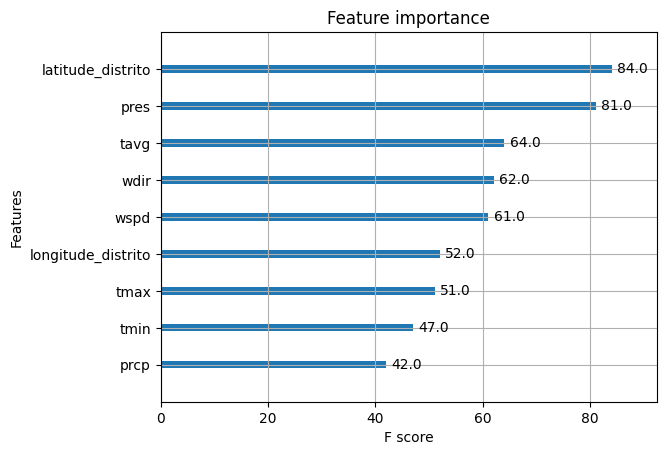

In [41]:
xgb.plot_importance(model)

In [42]:
# Calculando o peso da classe positiva
scale_pos_weight = float(len(y_train[y_train == 0])) / len(y_train[y_train == 1])

params = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'scale_pos_weight': scale_pos_weight
}

# Treinamento do modelo
model = xgb.train(params, dtrain, num_round)

In [43]:
coordenadas_distrito = {
    'Pedreira': {'latitude': -22.741347, 'longitude': -46.894846},
    'Socorro': {'latitude': -22.5902619, 'longitude': -46.5249112},
    'Unknown': {'latitude': -22.5902619, 'longitude': -46.5249112}
}

In [44]:
# Função para preencher as colunas
def preencher_coordenadas(row):
    coords = coordenadas_distrito.get(row['distrito'])
    if coords:
        row['latitude_distrito'] = coords['latitude']
        row['longitude_distrito'] = coords['longitude']
    return row

df = df.apply(preencher_coordenadas, axis=1)

In [45]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X = df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres', 'latitude_distrito', 'longitude_distrito']]
y = df['ocorrencia_bin']

# Aplicando SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Criando um novo DataFrame com os dados balanceados
data_balanced = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

In [46]:
data_balanced

,tavg,tmin,tmax,prcp,wdir,wspd,pres,latitude_distrito,longitude_distrito,ocorrencia_bin
0,25.500000,21.900000,31.000000,0.000000,316.000000,16.800000,1017.511112,-23.565372,-46.573697,0
1,25.500000,21.900000,31.000000,0.000000,316.000000,16.800000,1017.511112,-23.549906,-46.707642,0
2,25.500000,21.900000,31.000000,0.000000,316.000000,16.800000,1017.511112,-23.432908,-46.788534,0
3,25.500000,21.900000,31.000000,0.000000,316.000000,16.800000,1017.511112,-23.578024,-46.511454,0
4,29.600000,20.000000,31.000000,0.000000,315.000000,11.100000,1017.511112,-23.540469,-46.489791,0
...,...,...,...,...,...,...,...,...,...,...
738271,22.200000,19.000000,28.500000,0.000000,63.000000,8.700000,1014.100000,-23.708066,-46.744075,1
738272,22.582395,20.482395,26.484431,0.941318,136.313773,6.662755,1010.748982,-23.475055,-46.597017,1
738273,22.700000,18.000000,26.000000,37.100000,277.000000,13.500000,1012.300000,-23.584381,-46.678444,1
738274,20.500000,19.000000,23.000000,46.000000,159.000000,15.800000,1018.900000,-23.565911,-46.613680,1


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Features (variáveis explicativas) e alvo (target)
X = data_balanced[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres', 'latitude_distrito', 'longitude_distrito']]
y = data_balanced['ocorrencia_bin']

# Dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
classification_report_rf = classification_report(y_test, y_pred)

accuracy, classification_report_rf

(0.9298640082353579,
 '              precision    recall  f1-score   support\n\n           0       0.93      0.93      0.93     73902\n           1       0.93      0.93      0.93     73754\n\n    accuracy                           0.93    147656\n   macro avg       0.93      0.93      0.93    147656\nweighted avg       0.93      0.93      0.93    147656\n')

In [67]:
print(classification_report_rf)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     73902
           1       0.93      0.93      0.93     73754

    accuracy                           0.93    147656
   macro avg       0.93      0.93      0.93    147656
weighted avg       0.93      0.93      0.93    147656



In [54]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [49]:
bucket_name2 = 'black-umbrella-fiap'
object_key2 = 'silver/openweather/dados_previsao_meteorologica.csv'

In [50]:
previsao = acessar_csv_s3(bucket_name2, object_key2)

In [51]:
previsao = previsao.drop(columns=['umidade', 'index', 'condicoes', 'nuvens'])

KeyError: "['umidade', 'index', 'condicoes', 'nuvens'] not found in axis"

In [10]:
previsao = previsao.rename(columns={'data_previsao': 'data', 'temperatura': 'tavg', 'temperatura_minima': 'tmin', 'temperatura_maxima': 'tmax', 'precipitacao': 'prcp', 'velocidade_do_vento': 'wspd', 'direcao_do_vento': 'wdir', 'pressao': 'pres', 'latitude': 'latitude_distrito', 'longitude': 'longitude_distrito'})

In [18]:
previsao = previsao.reindex(columns=['data', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres', 'latitude_distrito', 'longitude_distrito'])

In [52]:
previsao

,data,tavg,tmin,tmax,prcp,wdir,wspd,pres,latitude_distrito,longitude_distrito
0,2024-09-17 21:00:00,15.35,15.35,15.77,0.0,141,6.43,1021,-23.565372,-46.573697
1,2024-09-18 00:00:00,15.10,14.60,15.10,0.0,133,5.69,1022,-23.565372,-46.573697
2,2024-09-18 03:00:00,14.66,14.32,14.66,0.0,120,4.96,1022,-23.565372,-46.573697
3,2024-09-18 06:00:00,14.27,14.27,14.27,0.0,110,4.73,1021,-23.565372,-46.573697
4,2024-09-18 09:00:00,14.35,14.35,14.35,0.0,90,4.20,1021,-23.565372,-46.573697
...,...,...,...,...,...,...,...,...,...,...
3835,2024-09-22 06:00:00,18.92,18.92,18.92,0.0,31,1.84,1011,-23.536248,-46.410022
3836,2024-09-22 09:00:00,18.76,18.76,18.76,0.0,38,1.75,1013,-23.536248,-46.410022
3837,2024-09-22 12:00:00,26.99,26.99,26.99,0.0,360,1.08,1014,-23.536248,-46.410022
3838,2024-09-22 15:00:00,35.00,35.00,35.00,0.0,259,2.59,1010,-23.536248,-46.410022


In [68]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carregue o modelo treinado
model = pickle.load(open('random_forest_model.pkl', 'rb'))

# Prepare os novos dados (exemplo: removendo a coluna alvo e aplicando normalização)
X_new = previsao[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres', 'latitude_distrito', 'longitude_distrito']]
scaler = StandardScaler()
scaler.fit(X_train)
X_new_scaled = scaler.transform(X_new)  # Assumindo que scaler é o objeto utilizado para normalização

# Faça as previsões
predictions = model.predict(X_new_scaled)

In [69]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
print(predictions)

[0 0 0 ... 0 0 0]


In [59]:
predictions_df = pd.DataFrame({'prediction': predictions})

In [60]:
predictions_df

,prediction
0,0
1,0
2,0
3,0
4,0
...,...
3835,0
3836,0
3837,0
3838,0


In [61]:
merge = pd.concat([previsao, predictions_df], axis=1)

In [62]:
merge

,data,tavg,tmin,tmax,prcp,wdir,wspd,pres,latitude_distrito,longitude_distrito,prediction
0,2024-09-17 21:00:00,15.35,15.35,15.77,0.0,141,6.43,1021,-23.565372,-46.573697,0
1,2024-09-18 00:00:00,15.10,14.60,15.10,0.0,133,5.69,1022,-23.565372,-46.573697,0
2,2024-09-18 03:00:00,14.66,14.32,14.66,0.0,120,4.96,1022,-23.565372,-46.573697,0
3,2024-09-18 06:00:00,14.27,14.27,14.27,0.0,110,4.73,1021,-23.565372,-46.573697,0
4,2024-09-18 09:00:00,14.35,14.35,14.35,0.0,90,4.20,1021,-23.565372,-46.573697,0
...,...,...,...,...,...,...,...,...,...,...,...
3835,2024-09-22 06:00:00,18.92,18.92,18.92,0.0,31,1.84,1011,-23.536248,-46.410022,0
3836,2024-09-22 09:00:00,18.76,18.76,18.76,0.0,38,1.75,1013,-23.536248,-46.410022,0
3837,2024-09-22 12:00:00,26.99,26.99,26.99,0.0,360,1.08,1014,-23.536248,-46.410022,0
3838,2024-09-22 15:00:00,35.00,35.00,35.00,0.0,259,2.59,1010,-23.536248,-46.410022,0


In [65]:
merge['prediction'].value_counts()

prediction
0    3840
Name: count, dtype: int64

In [71]:
df

,data,tavg,tmin,tmax,prcp,wdir,wspd,pres,distrito,latitude_distrito,longitude_distrito,ocorrencia,longitude_ocorrencia,latitude_ocorrencia,ocorrencia_bin
0,2013-01-01,25.5,21.9,31.0,0.0,316.0,16.8,1017.511112,Agua Rasa,-23.565372,-46.573697,NaN,NaN,NaN,0
1,2013-01-01,25.5,21.9,31.0,0.0,316.0,16.8,1017.511112,Alto De Pinheiros,-23.549906,-46.707642,NaN,NaN,NaN,0
2,2013-01-01,25.5,21.9,31.0,0.0,316.0,16.8,1017.511112,Anhanguera,-23.432908,-46.788534,NaN,NaN,NaN,0
3,2013-01-01,25.5,21.9,31.0,0.0,316.0,16.8,1017.511112,Aricanduva,-23.578024,-46.511454,NaN,NaN,NaN,0
4,2013-01-01,29.6,20.0,31.0,0.0,315.0,11.1,1017.511112,Artur Alvim,-23.540469,-46.489791,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427405,2024-09-16,16.6,14.9,18.5,3.5,175.0,15.1,1016.500000,Vila Mariana,-23.583700,-46.632741,NaN,NaN,NaN,0
427406,2024-09-16,16.6,14.2,20.3,4.5,150.0,15.5,1020.800000,Vila Matilde,-23.536179,-46.524605,NaN,NaN,NaN,0
427407,2024-09-16,17.4,15.6,21.0,3.2,190.0,10.9,1017.600000,Vila Medeiros,-23.487707,-46.584496,NaN,NaN,NaN,0
427408,2024-09-16,16.6,14.9,18.5,3.5,175.0,15.1,1016.500000,Vila Prudente,-23.592335,-46.574961,NaN,NaN,NaN,0


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Remover colunas não úteis para o treinamento
data = df.drop(columns=['data', 'longitude_ocorrencia', 'latitude_ocorrencia'])

# Separar características (features) e rótulo (label)
X = data.drop(columns=['ocorrencia_bin'])
y = data['ocorrencia_bin']

# Codificar variáveis categóricas se necessário
X = pd.get_dummies(X)  # Converte variáveis categóricas em variáveis dummy (one-hot encoding)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
# Criar e treinar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o desempenho
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110749
           1       1.00      1.00      1.00     17474

    accuracy                           1.00    128223
   macro avg       1.00      1.00      1.00    128223
weighted avg       1.00      1.00      1.00    128223



In [76]:
import joblib

# Salvar o modelo treinado
joblib.dump(model, 'modelo_ocorrencias.pkl')

['modelo_ocorrencias.pkl']

In [79]:
# Carregar o modelo treinado
model = joblib.load('random_forest_model.pkl')

# Fazer previsões com novos dados
previsao2 = previsao.drop(columns=['data'])
new_data = pd.get_dummies(previsao2)
#new_data = scaler.transform(new_data)  # Normalizar os novos dados

# Fazer previsões
predictions = model.predict(new_data)
print(predictions)

[0 0 0 ... 0 0 0]
